In [59]:
import numpy as np
import scipy.io
import numpy.linalg as linalg
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab

# 2. MLE of multivariate guassian

Part C: calculate mean and variance

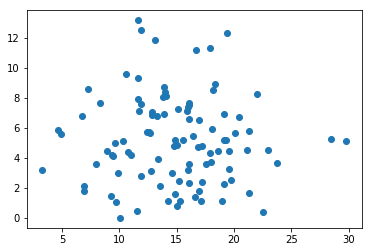

[ 14.8534219    5.20031534]
[[ 22.53300003  -0.27559114]
 [ -0.27559114   8.45710135]]


In [29]:
mu = [15, 5]
sigma = [[20, 0], [0, 10]]
samples = np.random.multivariate_normal(mu, sigma, size=100)
plt.scatter(samples[:, 0], samples[:, 1])
plt.show()
n=100
mean=samples.sum(axis=0)
mean=1/n*mean
var=np.zeros((2,2))
for j in range(0,len(samples)):
    xt=(samples[j,:]-mean)[np.newaxis]
    x=np.matrix.transpose(xt)
    var=var+np.dot(x,xt)
var=1/n*var
print(mean)
print(var)

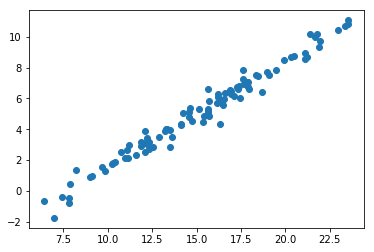

[ 15.25967159   5.14760403]
[[ 16.87425918  11.59680467]
 [ 11.59680467   8.17537625]]


In [28]:
import numpy as np
import matplotlib.pyplot as plt
mu = [15, 5]
sigma = [[20, 14], [14, 10]]
samples = np.random.multivariate_normal(mu, sigma, size=100)
plt.scatter(samples[:, 0], samples[:, 1])
plt.show()
n=100
mean=samples.sum(axis=0)
mean=1/n*mean
var=np.zeros((2,2))
for j in range(0,len(samples)):
    xt=(samples[j,:]-mean)[np.newaxis]
    x=np.matrix.transpose(xt)
    var=var+np.dot(x,xt)
var=1/n*var
print(mean)
print(var)

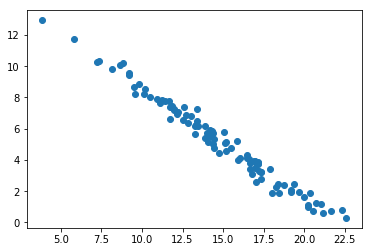

[ 14.74577303   5.23704536]
[[ 14.77265159 -10.42397641]
 [-10.42397641   7.51869985]]


In [27]:
import numpy as np
import matplotlib.pyplot as plt
mu = [15, 5]
sigma = [[20, -14], [-14, 10]]
samples = np.random.multivariate_normal(mu, sigma, size=100)
plt.scatter(samples[:, 0], samples[:, 1])
plt.show()
n=100
mean=samples.sum(axis=0)
mean=1/n*mean
var=np.zeros((2,2))
for j in range(0,len(samples)):
    xt=(samples[j,:]-mean)[np.newaxis]
    x=np.matrix.transpose(xt)
    var=var+np.dot(x,xt)
var=1/n*var
print(mean)
print(var)

# 3. Tikhonov Regularization

Part D: Contours of Posteriors

When there are few data points, the prior has a huge effect on the likelihood of the models.  Below we see that as the data increases, the prior has less of an effect on likelihood of the model.

In [53]:
prior_var=np.zeros((6,2,2))
prior_var[0,:,:]=np.array([[1,0],[0,1]])
prior_var[1,:,:]=np.array([[1,0.25],[0.25,1]])
prior_var[2,:,:]=np.array([[1,0.9],[0.9,1]])
prior_var[3,:,:]=np.array([[1,-0.25],[-0.25,1]])
prior_var[4,:,:]=np.array([[1,-0.9],[-0.9,1]])
prior_var[5,:,:]=np.array([[.1,0],[0,.1]])


C:\Users\laura_brink\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:42: RuntimeWarning: divide by zero encountered in log


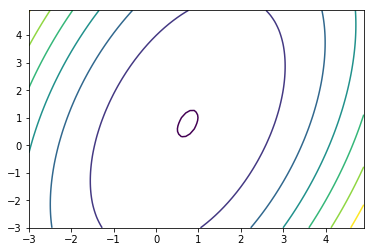

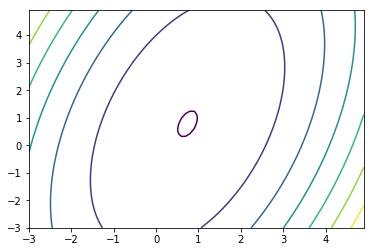

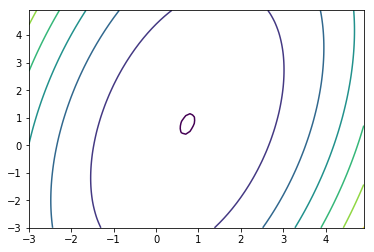

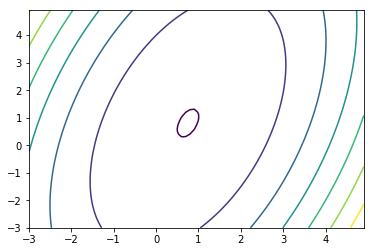

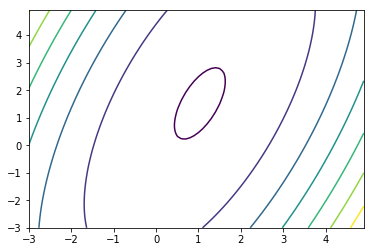

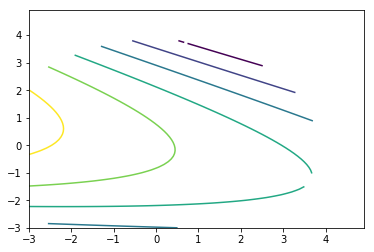

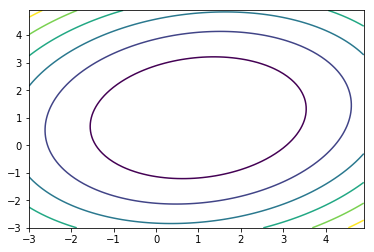

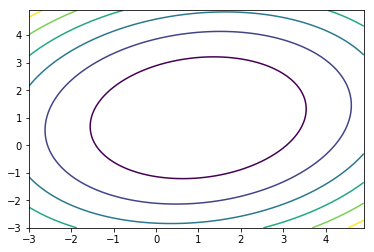

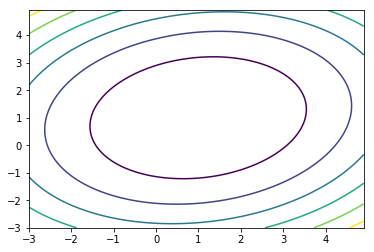

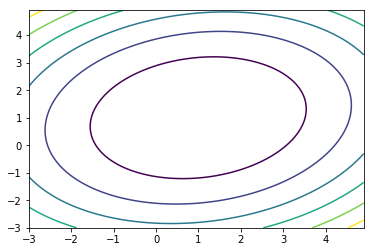

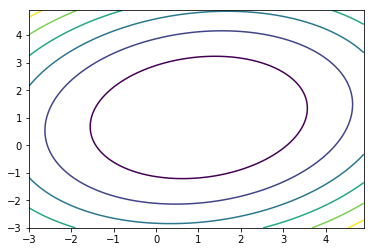

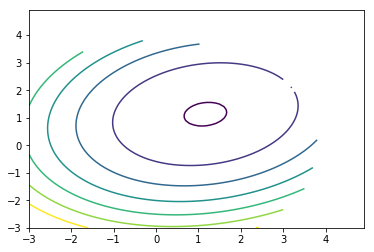

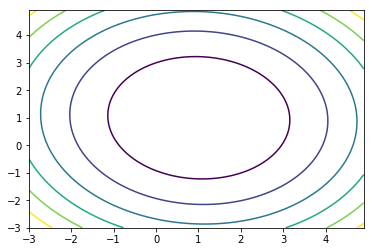

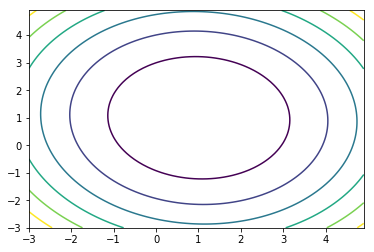

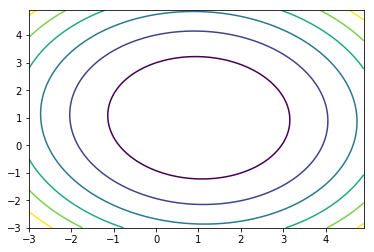

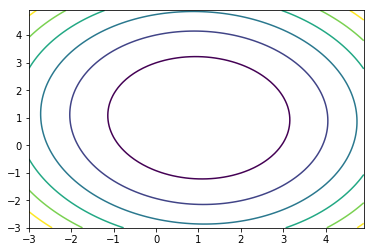

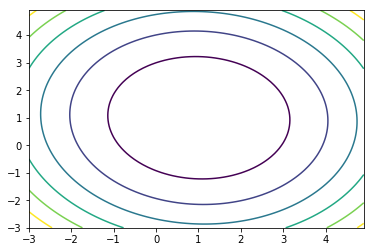

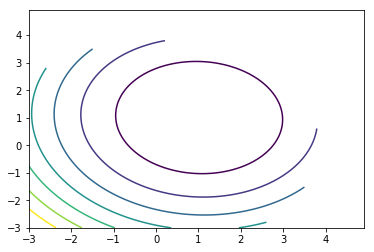

In [232]:
nl=[5,50,500]
# nl=[50]
W1=np.arange(-3,5,0.1)
W2=np.arange(-3,5,0.1)

# repeat for all number of training samples
for nind in range(0,len(nl)):
    n=nl[nind]
    X = np.random.normal(0,5,(n,2))
    Z = np.random.normal(0,1,n)
    Y = np.zeros(n)
    for j in range(0,n):
        Y[j]=X[j,0]+X[j,1]+Z[j]


    # repeat for all covariance matrices
    for k in range(0,len(prior_var)):
        # define the posterior on W
        # Use matplotlib.mlab.bivariate normal to generate the value of pdf for bivariate normals
        model_likelihood=np.zeros((len(W1),len(W2)))

        sigmax=prior_var[k,0,0]
        sigmay=prior_var[k,1,1]
        sigmaxy=prior_var[k,0,1]
#         print(sigmaxy)
        mux=0
        muy=0

        for ind1 in range(0,len(W1)):
                for ind2 in range(0,len(W2)):
        #             calculate the likelihood portion from the test data
                    likelihood=0
                    for j in range(0,n):
                        likelihood=likelihood+(Y[j]-(W1[ind1]*X[j,0]+W2[ind2]*X[j,1]))**2

                    likelihood=likelihood/2

        #             calculate the likelihood portion from the w bivariate normal
        #             matplotlib.mlab.bivariate_normal(X, Y, sigmax=, sigmay=, mux=, muy=, sigmaxy=)
                    wl=matplotlib.mlab.bivariate_normal(W1[ind1], W2[ind2], sigmax, sigmay, mux, muy, sigmaxy)

                    model_likelihood[ind1,ind2]=likelihood+np.log(wl)
                
#         find the minimum likelihood indices 

        # plot the w, b axes with likelihood mesh grid
#         print(k)
        L,M=np.meshgrid(W1, W2)
        CS = plt.contour(L, M, model_likelihood)
        plt.figure()
        
#         print(model_likelihood)
#         print(likelihood)
#         print(wl)

Part E: Influence of priors

First try for a bad prior: prior_var[4,:,:]=np.array([[1,-0.9],[-0.9,1]])

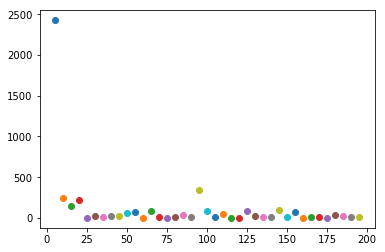

In [278]:
k=4
sigmax=prior_var[k,0,0]
sigmay=prior_var[k,1,1]
sigmaxy=prior_var[k,0,1]
#         print(sigmaxy)
mux=0
muy=0

# list of n values
nl=np.arange(5,200,5)
plt.figure()

W1=np.arange(-3,5,0.1)
W2=np.arange(-3,5,0.1)

# training
for nind in range(0,len(nl)):
    n=nl[nind]
    X = np.random.normal(0,5,(n,2))
    Z = np.random.normal(0,1,n)
    Y = np.zeros(n)
    for j in range(0,n):
        Y[j]=X[j,0]+X[j,1]+Z[j]
        
    # determine the best value for w
    minl=1000
    for ind1 in range(0,len(W1)):
        for ind2 in range(0,len(W2)):
        #             calculate the likelihood portion from the test data
            likelihood=0
            for j in range(0,n):
                likelihood=likelihood+(Y[j]-(W1[ind1]*X[j,0]+W2[ind2]*X[j,1]))**2

            likelihood=likelihood/2

#             calculate the likelihood portion from the w bivariate normal
#             matplotlib.mlab.bivariate_normal(X, Y, sigmax=, sigmay=, mux=, muy=, sigmaxy=)
            wl=matplotlib.mlab.bivariate_normal(W1[ind1], W2[ind2], sigmax, sigmay, mux, muy, sigmaxy)

            model_likelihood[ind1,ind2]=likelihood+np.log(wl)
            if model_likelihood[ind1,ind2]<=minl:
                minl=model_likelihood[ind1,ind2]
                W1opt_ind=ind1
                W2opt_ind=ind2
    
    W1opt=W1[W1opt_ind]
    W2opt=W2[W2opt_ind]

    # testing!
    ntest=100
    Xtest = np.random.normal(0,5,(ntest,2))
    Ztest = np.random.normal(0,1,ntest)
    Ytest = np.zeros(ntest)
    mse=0
    for ni in range(0,ntest):
        Ytest[ni]=Xtest[ni,0]+Xtest[ni,1]+Ztest[ni]
        Yest=W1opt*Xtest[i,0]+W2opt*Xtest[i,1]
        mse=mse+(Ytest[i]-Yest)**2

    # means square error: 1/n sum (Ytest-Yest)**2

    mse=mse/n
    plt.plot(n,mse,"o")

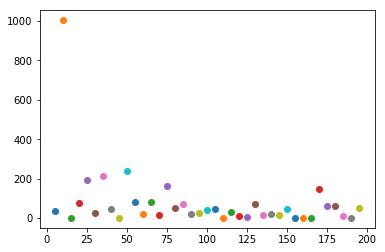

In [279]:
# and now a good prior
k=0
sigmax=prior_var[k,0,0]
sigmay=prior_var[k,1,1]
sigmaxy=prior_var[k,0,1]
#         print(sigmaxy)
mux=0
muy=0

# list of n values
nl=np.arange(5,200,5)
plt.figure()

W1=np.arange(-3,5,0.1)
W2=np.arange(-3,5,0.1)

# training
for nind in range(0,len(nl)):
    n=nl[nind]
    X = np.random.normal(0,5,(n,2))
    Z = np.random.normal(0,1,n)
    Y = np.zeros(n)
    for j in range(0,n):
        Y[j]=X[j,0]+X[j,1]+Z[j]
        
    # determine the best value for w
    minl=1000
    for ind1 in range(0,len(W1)):
        for ind2 in range(0,len(W2)):
        #             calculate the likelihood portion from the test data
            likelihood=0
            for j in range(0,n):
                likelihood=likelihood+(Y[j]-(W1[ind1]*X[j,0]+W2[ind2]*X[j,1]))**2

            likelihood=likelihood/2

#             calculate the likelihood portion from the w bivariate normal
#             matplotlib.mlab.bivariate_normal(X, Y, sigmax=, sigmay=, mux=, muy=, sigmaxy=)
            wl=matplotlib.mlab.bivariate_normal(W1[ind1], W2[ind2], sigmax, sigmay, mux, muy, sigmaxy)

            model_likelihood[ind1,ind2]=likelihood+np.log(wl)
            if model_likelihood[ind1,ind2]<=minl:
                minl=model_likelihood[ind1,ind2]
                W1opt_ind=ind1
                W2opt_ind=ind2
    
    W1opt=W1[W1opt_ind]
    W2opt=W2[W2opt_ind]

    # testing!
    ntest=100
    Xtest = np.random.normal(0,5,(ntest,2))
    Ztest = np.random.normal(0,1,ntest)
    Ytest = np.zeros(ntest)
    mse=0
    for ni in range(0,ntest):
        Ytest[ni]=Xtest[ni,0]+Xtest[ni,1]+Ztest[ni]
        Yest=W1opt*Xtest[i,0]+W2opt*Xtest[i,1]
        mse=mse+(Ytest[i]-Yest)**2

    # means square error: 1/n sum (Ytest-Yest)**2

    mse=mse/n
    plt.plot(n,mse,"o")

# 4. Total Least Squares

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread,imsave

imFile = 'stpeters_probe_small.png'
compositeFile = 'tennis.png'
targetFile = 'interior.jpg'

Part C: OLS

In [149]:
# This loads and returns all of the images needed for the problem
# data - the image of the spherical mirror
# tennis - the image of the tennis ball that we will relight
# target - the image that we will paste the tennis ball onto
def loadImages():
    imFile = 'stpeters_probe_small.png'
    compositeFile = 'tennis.png'
    targetFile = 'interior.jpg'
    
    data = imread(imFile).astype('float')*1.5
    tennis = imread(compositeFile).astype('float')
    target = imread(targetFile).astype('float')/255

    return data, tennis, target
    

# This function takes as input a square image of size m x m x c
# where c is the number of color channels in the image.  We
# assume that the image contains a sphere and that the edges
# of the sphere touch the edge of the image.
# The output is a tuple (ns, vs) where ns is an n x 3 matrix
# where each row is a unit vector of the direction of incoming light
# vs is an n x c vector where the ith row corresponds with the
# image intensity of incoming light from the corresponding row in ns
def extractNormals(img):

    # Assumes the image is square
    d = img.shape[0]
    r = d / 2
    ns = []
    vs = []
    for i in range(d):
        for j in range(d):

            # Determine if the pixel is on the sphere
            x = j - r
            y = i - r
            if x*x + y*y > r*r-100:
                continue

            # Figure out the normal vector at the point
            # We assume that the image is an orthographic projection
            z = np.sqrt(r*r-x*x-y*y)
            n = np.asarray([x,y,z])
            n = n / np.sqrt(np.sum(np.square(n)))
            view = np.asarray([0,0,-1])
            n = 2*n*(np.sum(n*view))-view
            ns.append(n)
            vs.append(img[i,j])

    return np.asarray(ns), np.asarray(vs)

# This function renders a diffuse sphere of radius r
# using the spherical harmonic coefficients given in
# the input coeff where coeff is a 9 x c matrix
# with c being the number of color channels
# The output is an 2r x 2r x c image of a diffuse sphere
# and the value of -1 on the image where there is no sphere
def renderSphere(r,coeff):

    d = 2*r
    img = -np.ones((d,d,3))
    ns = []
    ps = []

    for i in range(d):
        for j in range(d):

            # Determine if the pixel is on the sphere
            x = j - r
            y = i - r
            if x*x + y*y > r*r:
                continue

            # Figure out the normal vector at the point
            # We assume that the image is an orthographic projection
            z = np.sqrt(r*r-x*x-y*y)
            n = np.asarray([x,y,z])
            n = n / np.sqrt(np.sum(np.square(n)))
            ns.append(n)
            ps.append((i,j))

    ns = np.asarray(ns)
    B = computeBasis(ns)
    vs = B.dot(coeff)

    for p,v in zip(ps,vs):
        img[p[0],p[1]] = np.clip(v,0,255)

    return img

# relights the sphere in img, which is assumed to be a square image
# coeff is the matrix of spherical harmonic coefficients
def relightSphere(img, coeff):
    img = renderSphere(int(img.shape[0]/2),coeff)/255*img/255
    return img

# Copies the image of source onto target
# pixels with values of -1 in source will not be copied
def compositeImages(source, target):
    
    # Assumes that all pixels not equal to 0 should be copied
    out = target.copy()
    cx = int(target.shape[1]/2)
    cy = int(target.shape[0]/2)
    sx = cx - int(source.shape[1]/2)
    sy = cy - int(source.shape[0]/2)

    for i in range(source.shape[0]):
        for j in range(source.shape[1]):
            if np.sum(source[i,j]) >= 0:
                out[sy+i,sx+j] = source[i,j]

    return out

# Fill in this function to compute the basis functions
# This function is used in renderSphere()
def computeBasis(ns):
    # Returns the first 9 spherical harmonic basis functions

    #################################################
    # Compute the first 9 basis functions
    #################################################
    B = np.zeros((len(ns),9)) # This line is here just to fill space
    
    for j in range(0,len(ns)):
        x=ns[j,0]
        y=ns[j,1]
        z=ns[j,2]
        
        B[j,0]=1
        B[j,1]=y
        B[j,2]=x
        B[j,3]=z
        B[j,4]=x*y
        B[j,5]=y*z
        B[j,6]=3*z**2-1
        B[j,7]=x*z
        B[j,8]=x**2-y**2
    
    return B

Coefficients:
[[ 202.31845431  162.41956802  149.07075034]
 [ -27.66555164  -17.88905339  -12.92356688]
 [  -5.15203925   -4.51375871   -4.24262639]
 [  -1.08629293    0.42947012    1.15475569]
 [  -3.14053107   -3.70269907   -3.74382934]
 [  23.67671768   23.15698002   21.94638397]
 [  -3.82167171    0.57606634    1.81637483]
 [   4.7346737     1.4677692    -1.12253649]
 [  -9.72739616   -5.75691108   -4.8395598 ]]


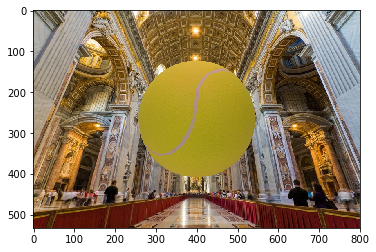

In [160]:
if __name__ == '__main__':

    data,tennis,target = loadImages()
# ns is an n x 3 matrix where each row is a unit vector of the direction of incoming light
# vs is an n x c vector where the ith row corresponds with the image intensity of incoming light from the corresponding row in ns
    ns, vs = extractNormals(data)
    B = computeBasis(ns)

    # reduce the number of samples because computing the SVD on
    # the entire data set takes too long
    Bp = B[::50]
    vsp = vs[::50]
    
    #################################################
    # Solve for the coefficients using least squares
    # or total least squares here
    ##################################################
    
#     OLS
#     We want min ||vsp-Bp*coeff||^2
#     and we know that from OLS that coeff*=(Bp.TBp)^-1Bp.Tvsp
    Bpt=np.matrix.transpose(Bp)
    BptBinv=linalg.inv(np.dot(Bpt,Bp))
    coeff=np.dot(np.dot(BptBinv,Bpt),vsp)
    
    #coeff = np.zeros((9,3))
    #coeff[0,:] = 255
    
    img = relightSphere(tennis,coeff)

    output = compositeImages(img,target)

    print('Coefficients:\n'+str(coeff))

    plt.figure(1)
    plt.imshow(output)
    plt.show()

    imsave('output.png',output)

Part D: TLS

Coefficients:
[[ 214.8315375   172.45812442  158.28249759]
 [ -33.32866277  -21.49356942  -15.49471908]
 [  -6.10484778   -5.35738272   -5.05359386]
 [  -1.36017113    0.46289619    1.34025806]
 [ -25.34212773  -29.68688704  -29.89218111]
 [ 195.2762482   190.46787726  180.03847995]
 [  -4.14989152    0.58493533    1.92140102]
 [  43.5067045    16.78214693   -4.59898962]
 [ -12.45808493   -7.37757515   -6.20446144]]


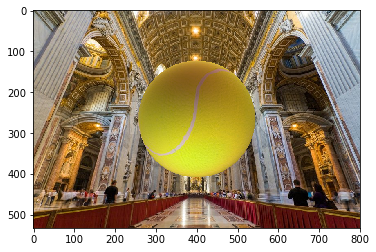

In [203]:
if __name__ == '__main__':

    data,tennis,target = loadImages()
# ns is an n x 3 matrix where each row is a unit vector of the direction of incoming light
# vs is an n x c vector where the ith row corresponds with the image intensity of incoming light from the corresponding row in ns
    ns, vs = extractNormals(data)
    B = computeBasis(ns)

    # reduce the number of samples because computing the SVD on
    # the entire data set takes too long
    Bp = B[::50]
    vsp = vs[::50]
    
    #################################################
    # Solve for the coefficients using least squares
    # or total least squares here
    ##################################################
    
#     TLS
#     We want min [A+Ahat, y+yhat][w, -1]T=0
#     from part b, the optimal [w, -1]T=alpha*vd+1
    
    # first we want to find the SVD of [A,y]=[Bp,vsp]
    M=np.concatenate((Bp, vsp), axis=1)
    # since M is not square, we can find V by taking the SVD of MTM
    Mt=np.matrix.transpose(M)
    U, s, V = np.linalg.svd((np.dot(Mt,M)), full_matrices=True)
    # where V here is actually VT
    # so the last row will be vd+1
    vd1=V[len(V)-1,:]
    
    Ishape = Bpt.shape[0]
    Bpt=np.matrix.transpose(Bp)
    ridgeinv=linalg.inv(np.dot(Bpt,Bp)-np.identity(Ishape)*s[len(s)-1])
    coeff=np.dot(np.dot(ridgeinv, Bpt), vsp)
    
    
    
#     coeff=np.dot(np.dot(BptBinv,Bpt),vsp)
    
    #coeff = np.zeros((9,3))
    #coeff[0,:] = 255
    
    img = relightSphere(tennis,coeff)

    output = compositeImages(img,target)

    print('Coefficients:\n'+str(coeff))

    plt.figure(1)
    plt.imshow(output)
    plt.show()

    imsave('output.png',output)

Part E:

The reason that the bright areas become less bright is that the inputs and outputs are being scaled differently.  When one is scaled, the other must also be scaled to keep the proportions the same.  This is coming into affect with the value of the coefficients.  We will need to multiply the coefficients by what vsp is being divided by.


Coefficients:
[[ 214.8315375   172.45812442  158.28249759]
 [ -33.32866277  -21.49356942  -15.49471908]
 [  -6.10484778   -5.35738272   -5.05359386]
 [  -1.36017113    0.46289619    1.34025806]
 [ -25.34212773  -29.68688704  -29.89218111]
 [ 195.2762482   190.46787726  180.03847995]
 [  -4.14989152    0.58493533    1.92140102]
 [  43.5067045    16.78214693   -4.59898962]
 [ -12.45808493   -7.37757515   -6.20446144]]


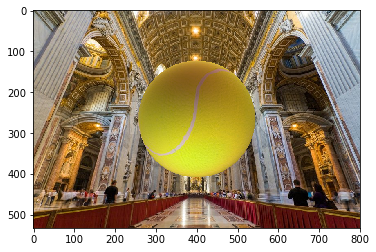

In [217]:
if __name__ == '__main__':

    data,tennis,target = loadImages()
# ns is an n x 3 matrix where each row is a unit vector of the direction of incoming light
# vs is an n x c vector where the ith row corresponds with the image intensity of incoming light from the corresponding row in ns
    ns, vs = extractNormals(data)
    B = computeBasis(ns)

    # reduce the number of samples because computing the SVD on
    # the entire data set takes too long
    Bp = B[::50]
    vsp = vs[::50]
    
    #################################################
    # Solve for the coefficients using least squares
    # or total least squares here
    ##################################################
    
#     TLS
#     We want min [A+Ahat, y+yhat][w, -1]T=0
#     from part b, the optimal [w, -1]T=alpha*vd+1
    
    # first we want to find the SVD of [A,y]=[Bp,vsp]
    M=np.concatenate((Bp, vsp), axis=1)
    # since M is not square, we can find V by taking the SVD of MTM
    Mt=np.matrix.transpose(M)
    U, s, V = np.linalg.svd((np.dot(Mt,M)), full_matrices=True)
    # where V here is actually VT
    # so the last row will be vd+1
    vd1=V[len(V)-1,:]
    
    Ishape = Bpt.shape[0]
    Bpt=np.matrix.transpose(Bp)
    ridgeinv=linalg.inv(np.dot(Bpt,Bp)-np.identity(Ishape)*s[len(s)-1])
    
    # try dividing vsp by 384
    scale=384
    vspr=vsp/scale
    coeff=np.dot(np.dot(ridgeinv, Bpt), vspr)
    coeff=coeff*scale
    
    
    
#     coeff=np.dot(np.dot(BptBinv,Bpt),vsp)
    
    #coeff = np.zeros((9,3))
    #coeff[0,:] = 255
    
    img = relightSphere(tennis,coeff)

    output = compositeImages(img,target)

    print('Coefficients:\n'+str(coeff))

    plt.figure(1)
    plt.imshow(output)
    plt.show()

    imsave('output.png',output)